# IPL Win Probability Predictor


In India, we know that IPL is so popular that most of us spend our evenings watching matches in summer supporting our teams. Especially the match gets interesting in the 2nd innings while chasing the target and it increases the curiosity of the match. So, here we develop a machine learning algorithm that predicts the win probability of an IPL team batting in the 2nd innings of a t20 cricket match. Using this model, we could predict the winning probability of our favourite team in the match.

### Importing Libraries 

In [1]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

### Importing the dataset



The datasets used in developing this algorithm are downloaded from here: 
https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set?select=matches.csv and https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set?select=deliveries.csv

In [9]:
match = pd.read_csv('IPL.csv')

In [10]:
delivery = pd.read_csv('deliveries.csv')

In [11]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [13]:
match.shape

(756, 18)

In [14]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [15]:
delivery.shape

(179078, 21)

In [18]:
delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [19]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### Data Analysis

In [21]:
match['city'].nunique()

32

In [22]:
match['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [23]:
match['city'] = match['city'].str.replace('Bangalore', 'Bengaluru')

In [24]:
match['city'].nunique()

31

In [25]:
match.Season.unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [26]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bengaluru,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [28]:
pom = match.player_of_match.value_counts().head(10)

In [30]:
pom

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

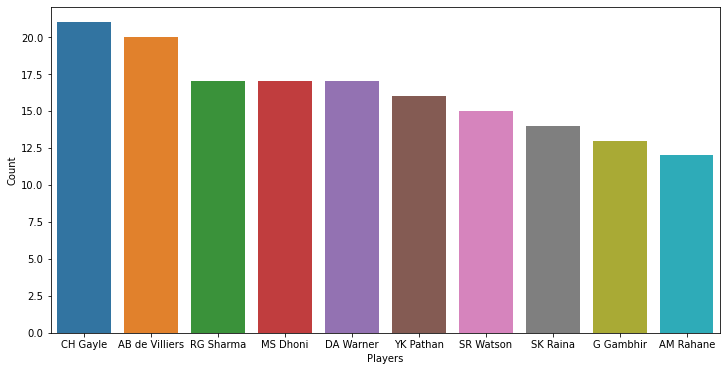

In [32]:
plt.figure(figsize = (12,6))
sns.barplot(pom.index, pom)
plt.xlabel('Players')
plt.ylabel('Count')

The plot suggests that Chris Gayle has won most player of the match awards in the IPL tournaments, followed by AB de Villiers.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='toss_decision', ylabel='count'>

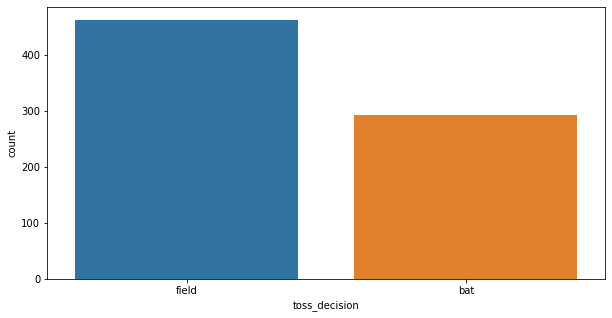

In [33]:
plt.figure(figsize = (10, 5))
sns.countplot(match.toss_decision)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Toss Winners')

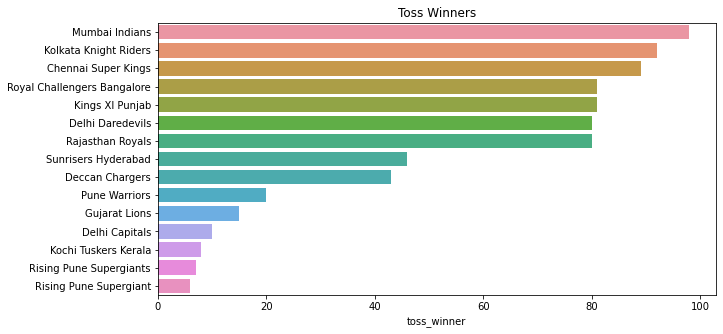

In [34]:
plt.figure(figsize = (10, 5))
toss_win = match.toss_winner.value_counts()
sns.barplot(toss_win, toss_win.index)
plt.title('Toss Winners')

Mumbai Indians team have won the toss most number of times over the years, followed by Kolkata Knight Riders.

In [42]:
temp = match[(match['toss_winner'] == match['winner'])].value_counts().reset_index()

In [43]:
temp.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,0
0,7894,IPL-2018,Mumbai,07-04-2018,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary,1
1,11322,IPL-2019,Mumbai,15-04-2019,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SL Malinga,Wankhede Stadium,Marais Erasmus,Nitin Menon,Nanda Kishore,1
2,11150,IPL-2019,Jaipur,02-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,S Gopal,Sawai Mansingh Stadium,Marais Erasmus,Anil Dandekar,Nitin Menon,1
3,11152,IPL-2019,Delhi,04-04-2019,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,5,J Bairstow,Feroz Shah Kotla Ground,C Shamshuddin,KN Anantapadmanabhan,S Ravi,1
4,11153,IPL-2019,Bengaluru,05-04-2019,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,5,AD Russell,M. Chinnaswamy Stadium,Anil Chaudhary,Chris Gaffaney,O Nandan,1


In [46]:
wins=temp['winner'].value_counts()

In [48]:
match[(match['toss_winner'] == match['winner'])].winner.value_counts()

Chennai Super Kings            57
Mumbai Indians                 56
Kolkata Knight Riders          53
Rajasthan Royals               42
Royal Challengers Bangalore    41
Delhi Daredevils               35
Kings XI Punjab                35
Sunrisers Hyderabad            23
Deccan Chargers                19
Gujarat Lions                  10
Delhi Capitals                  7
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Pune Warriors                   3
Name: winner, dtype: int64

In [47]:
wins

Chennai Super Kings            15
Kolkata Knight Riders           9
Mumbai Indians                  8
Rajasthan Royals                8
Kings XI Punjab                 7
Delhi Capitals                  6
Royal Challengers Bangalore     6
Sunrisers Hyderabad             6
Delhi Daredevils                2
Name: winner, dtype: int64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Teams winning both Toss and Match')

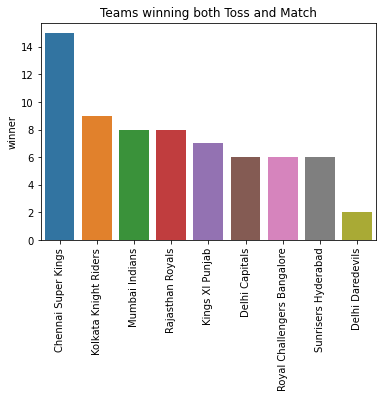

In [49]:
temp = match[(match['toss_winner'] == match['winner'])].value_counts().reset_index()
wins = temp['winner'].value_counts()
sns.barplot(wins.index, wins)
plt.xticks(rotation = 'vertical')
plt.title('Teams winning both Toss and Match')

Chennai Super Kings have the most number of matches where they won both the toss as well as the match.

In [53]:
match['Season'].value_counts()

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2016    60
IPL-2010    60
IPL-2014    60
IPL-2018    60
IPL-2019    60
IPL-2017    59
IPL-2015    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of matches played each year')

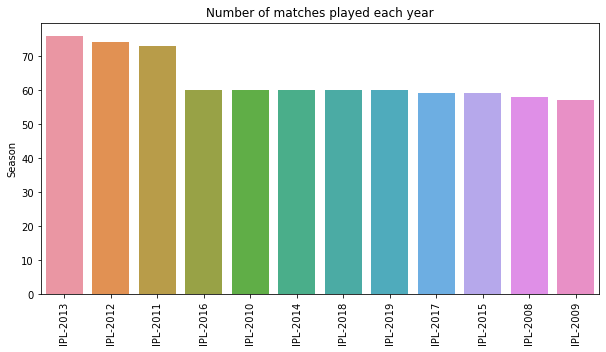

In [54]:
season = match['Season'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(season.index, season)
plt.xticks(rotation = 'vertical')
plt.title('Number of matches played each year')

IPL 2013 edition had the most number of matches being played in a season over the years.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of matches played in different cities')

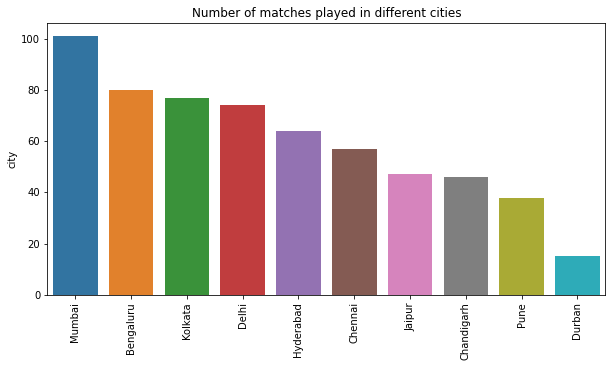

In [55]:
cities = match['city'].value_counts().head(10)
plt.figure(figsize = (10, 5))
sns.barplot(cities.index, cities)
plt.xticks(rotation = 'vertical')
plt.title('Number of matches played in different cities')

Mumbai city hosted most number of matches over the years and Bengaluru city has the second highest.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Teams winning by batting first')

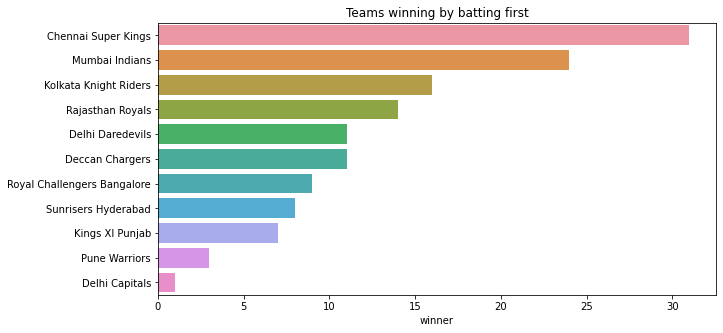

In [56]:
wins = match[(match.toss_decision == 'bat') & (match.win_by_runs != 0)]['winner'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(wins, wins.index)
plt.title('Teams winning by batting first')

Chennai Super Kings have won most number of matches by batting first, followed by Mumbai Indians

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Teams winning by fielding (bowling) first')

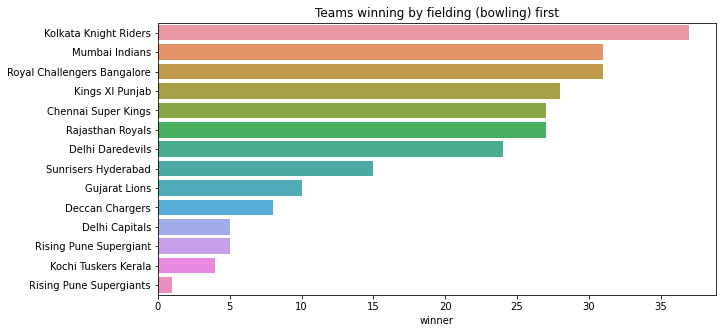

In [57]:
wins = match[(match.toss_decision == 'field') & (match.win_by_wickets != 0)]['winner'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(wins, wins.index)
plt.title('Teams winning by fielding (bowling) first')

Kolkata Knight Riders have won most number of matches by fielding (bowling) first, followed by Mumbai Indians.

In [62]:
runs = delivery.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns = ['Batsman', 'runs']
y = runs.sort_values(by='runs', ascending=False).head(10)

In [63]:
y

,Batsman,runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632
92,CH Gayle,4560
290,MS Dhoni,4477
384,RV Uthappa,4446
26,AB de Villiers,4428
147,G Gambhir,4223


Virat Kohli is the highest run scorer in this tournament! Suresh Raina follows Virat Kohli in the list.

### Data Pre-processing

Here, we would be extracting the target score for the second innings set by the first batting team. An extra run is summed up to the runs scored by team 1 to obtain the target score and is assigned to total_runs. Further, this new dataframe is being merged with the match dataset for future analysis.

In [72]:
total_score_df = (delivery.groupby(['match_id', 'inning']).sum()['total_runs']+1).reset_index()

In [73]:
total_score_df.head()

,match_id,inning,total_runs
0,1,1,208
1,1,2,173
2,2,1,185
3,2,2,188
4,3,1,184


In [74]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [75]:
total_score_df

,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1518,11347,1,144
1520,11412,1,137
1522,11413,1,172
1524,11414,1,156


In [78]:
match_df = match.merge(total_score_df[['match_id', 'total_runs']], left_on='id', right_on='match_id')

In [80]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bengaluru,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


In [81]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

Here, we could see all the teams played over the years in IPL. Some of the teams have not been playing in the recent years, so I have removed such teams data. Also, few of the teams have renamed their Franchise names to a new one in the recent times, I have replaced the old names with the present new name of the team.

In [82]:
teams = [
         'Sunrisers Hyderabad',
         'Mumbai Indians',
         'Royal Challengers Bangalore',
         'Kolkata Knight Riders',
         'Kings XI Punjab',
         'Chennai Super Kings',
         'Rajasthan Royals',
         'Delhi Capitals'
]

In [83]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [84]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [85]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
4,5,IPL-2017,Bengaluru,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159


In [86]:
match_df.shape

(641, 20)

Have removed the match data of the matches where duckworth lewis rule was applied in the rain affected situations where the win algorithm of the matches changes based on various aspects which doesn't contribute to our solution. Also, have extracted the required columns from the match_df dataframe and merged it with the delivery datatframe with match_id as reference in merging them.

In [87]:
match_df = match_df[match_df['dl_applied'] == 0]

In [88]:
match_df = match_df[['match_id', 'city', 'winner', 'total_runs']]

In [89]:
delivery_df = match_df.merge(delivery, on = 'match_id')

In [90]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [91]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bengaluru', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali'], dtype=object)

In [92]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [93]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [94]:
delivery_df.shape

(72413, 24)

Creating new features like current_score, runs_left for the target and balls_left to achieve the target score have been framed and added them to the delivery_df dataframe as new columns.

In [99]:
import warnings
warnings.filterwarnings("ignore")

In [100]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

In [101]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [102]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [103]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115


In [104]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


Current run rate is being calculated as Current_Runs / Overs_Played and Required run rate is being calculated as Runs_left / Overs_left.

In [105]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [106]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [107]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.0,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.0,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.0,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,205,116,10,4.5,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,201,115,10,8.4,10.486957


In [108]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

Using result(row) function, we obtain the target dataset column (Winner of the match) required for the model building.

In [109]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [110]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


In [111]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [112]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,208,6.0,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,208,3.0,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,208,2.0,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,208,4.5,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,208,8.4,10.486957,0


In [114]:
final_df = final_df.sample(final_df.shape[0])

In [115]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
25963,Royal Challengers Bangalore,Mumbai Indians,Johannesburg,99,87,9,150,9.272727,6.827586,1


In [116]:
final_df.dropna(inplace=True)

In [117]:
final_df = final_df[final_df['balls_left'] != 0]

The final dataset required for the model building is being developed after pre-processing and have extracted all the required columns in the dataframe.

In [118]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
1364,Kolkata Knight Riders,Kings XI Punjab,Kolkata,105,89,10,171,12.774194,7.078652,1
138648,Rajasthan Royals,Royal Challengers Bangalore,Jaipur,39,32,8,165,8.590909,7.312500,1
108014,Rajasthan Royals,Mumbai Indians,Mumbai,170,108,10,188,9.000000,9.444444,0
34732,Delhi Daredevils,Rajasthan Royals,Ahmedabad,95,88,8,142,8.812500,6.477273,1
48011,Kolkata Knight Riders,Chennai Super Kings,Chennai,65,53,9,154,7.970149,7.358491,0


### Training and Testing Data

In [121]:
 final_df.iloc[:,-1]

1364      1
138648    1
108014    0
34732     1
48011     0
         ..
13792     0
58377     0
146568    0
2163      0
128424    0
Name: result, Length: 71342, dtype: int64

In [122]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [124]:
len(X_train)

49939

In [126]:
len(X_test)

21403

### Building the Model

Have converted the categorical columns into feature vectors using OneHotEncoder with ColumnTransformer.

In [127]:
trf = ColumnTransformer([('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])],remainder='passthrough')

## 1. Logistic Regression

In [129]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear', multi_class = 'auto'))
])

In [130]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [132]:
y_pred = pipe.predict(X_test)

In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8039994393309349

In [134]:
pipe.predict_proba(X_test)[10]

array([0.10660706, 0.89339294])

In [135]:
pipe.predict_proba(X_test)

array([[0.45819264, 0.54180736],
       [0.58144712, 0.41855288],
       [0.12132057, 0.87867943],
       ...,
       [0.9819883 , 0.0180117 ],
       [0.50515175, 0.49484825],
       [0.41664253, 0.58335747]])

In [136]:
len(pipe.predict_proba(X_test))

21403

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     10113
           1       0.81      0.82      0.82     11290

    accuracy                           0.80     21403
   macro avg       0.80      0.80      0.80     21403
weighted avg       0.80      0.80      0.80     21403



### Conclusion

Here, I have analysed the features of the data and graphically visualized the data to explore the history, stats and records of IPL tournament. Have also performed several feature engineering techniques in order to make the data suitable for building the model. Encoding has been used for converting categorical features to numerical features. Further have created a Logistic Regression model and evaluated it with the test set finding the accuracy score.

### 2nd Innings Score Analysis with Win Probabilties in each Over.

Have built a function named as match_progression which gives the complete report plot of the 2nd innings of the match with runs scored per over, wickets fallen in an over and also the winning probability and losing probability of the team batting in the second innings of the match.

In [139]:
match = delivery_df[delivery_df['match_id']==71]

In [143]:
match = match[(match['ball']==6)]

In [144]:
temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()

In [145]:
temp_df = temp_df[temp_df['balls_left'] != 0]

In [146]:
result = pipe.predict_proba(temp_df)

In [154]:
np.round(result.T[0],1)

array([0.3, 0.3, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0. , 0. , 0. ])

In [155]:
np.round(result.T[1],1)

array([0.7, 0.7, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 1. , 1. , 1. ])

In [156]:
temp_df['lose']=np.round(result.T[0]*100,1)
temp_df['win']=np.round(result.T[1]*100,1)


In [159]:
temp_df['end_of_over'] = range(1, temp_df.shape[0]+1)

In [160]:
temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

In [165]:
target = temp_df['total_runs_x'].values[0]

In [166]:
runs = list(temp_df['runs_left'].values)

In [167]:
new_runs = runs[:]

In [169]:
runs.insert(0,target) ##inserts on zeroth index

In [174]:
temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

In [178]:
wickets = list(temp_df['wickets'].values)

In [179]:
new_wickets = wickets[:]

In [181]:
new_wickets.insert(0,10)

In [182]:
wickets.append(0)

In [183]:
w = np.array(wickets)
nw = np.array(new_wickets)

In [185]:
temp_df.shape

(17, 13)

In [187]:
temp_df['wickets_in_over'] = (nw -w)[0:temp_df.shape[0]]

#### Function

In [188]:
def match_progression(x_df, match_id, pipe):
  match = x_df[x_df['match_id'] == match_id]
  match = match[(match['ball'] == 6)]
  temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
  temp_df = temp_df[temp_df['balls_left'] != 0]
  result = pipe.predict_proba(temp_df)
  temp_df['lose'] = np.round(result.T[0]*100,1)
  temp_df['win'] = np.round(result.T[1]*100,1)
  temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
  temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

  target = temp_df['total_runs_x'].values[0]
  runs = list(temp_df['runs_left'].values)
  new_runs = runs[:]
  runs.insert(0,target)
  temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
  wickets = list(temp_df['wickets'].values)
  new_wickets = wickets[:]
  new_wickets.insert(0,10)
  wickets.append(0)
  w = np.array(wickets)
  nw = np.array(new_wickets)
  temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]



  plt.figure(figsize = (18, 8))

  plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], color = 'yellow', linewidth=3, label = 'Wickets in each over')
  plt.plot(temp_df['end_of_over'], temp_df['win'], color = 'green',linewidth=4, label = 'Winning Probability')
  plt.plot(temp_df['end_of_over'], temp_df['lose'], color = 'red',linewidth=4, label = 'Losing Probability')
  plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'], label = 'Runs in each over')
  plt.title('Target-' + str(target))
  plt.legend()
  plt.show()

  print("Batting Team-" + temp_df['batting_team'].values[0] + " | Bowling Team-" + temp_df['bowling_team'].values[0] + " | Target- " + str(temp_df['total_runs_x'].values[0]))
  temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
  return temp_df

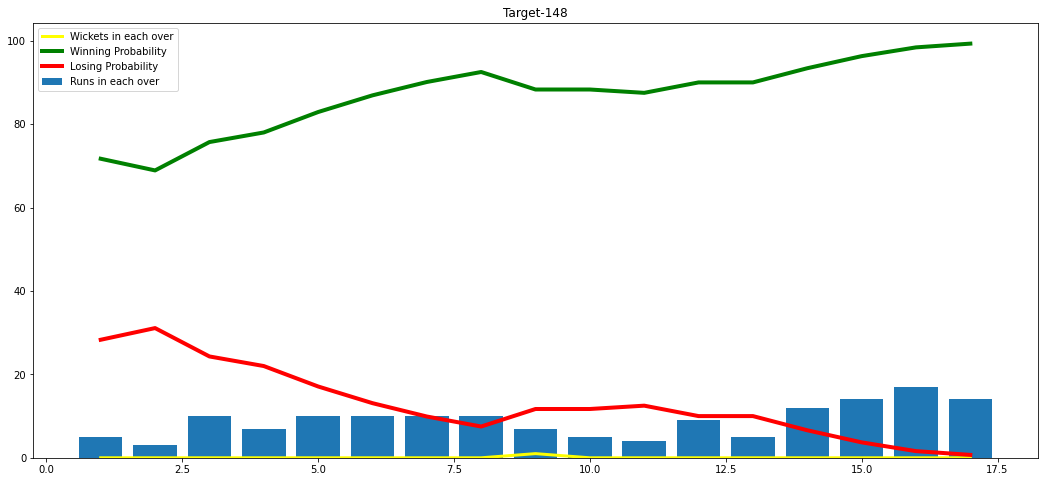

Batting Team-Chennai Super Kings | Bowling Team-Kolkata Knight Riders | Target- 148


,end_of_over,runs_after_over,wickets_in_over,lose,win
9779,1,5,0,28.3,71.7
9786,2,3,0,31.1,68.9
9792,3,10,0,24.3,75.7
9799,4,7,0,22.0,78.0
9806,5,10,0,17.1,82.9
9812,6,10,0,13.1,86.9
9818,7,10,0,9.9,90.1
9824,8,10,0,7.5,92.5
9831,9,7,1,11.7,88.3
9837,10,5,0,11.7,88.3


In [189]:
temp_df = match_progression(delivery_df,71,pipe)
temp_df

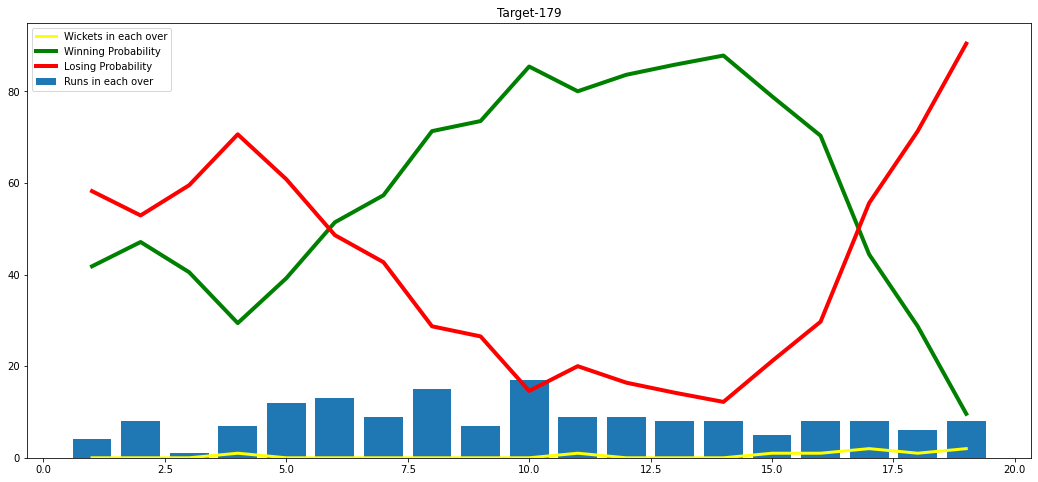

,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,58.2,41.8
10467,2,8,0,52.9,47.1
10473,3,1,0,59.5,40.5
10479,4,7,1,70.6,29.4
10485,5,12,0,60.8,39.2
10491,6,13,0,48.6,51.4
10497,7,9,0,42.7,57.3
10505,8,15,0,28.7,71.3
10511,9,7,0,26.5,73.5
10518,10,17,0,14.6,85.4


Batting Team-Royal Challengers Bangalore | Bowling Team-Chennai Super Kings | Target- 179


In [190]:
temp_df = match_progression(delivery_df,74,pipe)
temp_df